In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math
%matplotlib notebook
file = 'data/forTooltipCharting/0002.csv'
data = pd.read_csv(file)
data = data.drop(data.columns[0], axis=1)

In [3]:
data

,Name,Team,Salary,Tm,Age,Pos,G,GS,Tgt,Rec,...,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,Salary(Ms)
0,Amari Cooper,DAL,20000000,DAL,27,WR,15,14,104,68,...,865,12.7,8,45,41,8.3,4.5,57.7,1,20.000
1,Keenan Allen,LAC,16500000,LAC,29,WR,16,16,157,106,...,1138,10.7,6,66,42,7.2,6.6,71.1,1,16.500
2,Cooper Kupp,LAR,14875000,LAR,28,WR,17,17,191,145,...,1947,13.4,16,89,59,10.2,8.5,114.5,0,14.875
3,Jarvis Landry,CLE,14300000,CLE,29,WR,12,12,87,52,...,570,11.0,2,30,38,6.6,4.3,47.5,3,14.300
4,Mike Evans,TB,14000000,TAM,28,WR,16,16,114,74,...,1035,14.0,14,56,46,9.1,4.6,64.7,0,14.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Cody White,PIT,825000,PIT,23,NaN,15,0,6,5,...,33,6.6,0,3,11,5.5,0.3,2.2,0,0.825
107,Seth Williams,DEN,825000,DEN,21,wr,2,1,1,1,...,34,34.0,0,1,34,34.0,0.5,17.0,0,0.825
108,Dax Milne,WAS,825000,WAS,22,wr,13,1,14,9,...,83,9.2,0,4,22,5.9,0.7,6.4,1,0.825
109,Tarik Black,NYJ,705000,NYJ,23,NaN,1,0,2,1,...,10,10.0,0,1,10,5.0,1.0,10.0,0,0.705


<IPython.core.display.Javascript object>


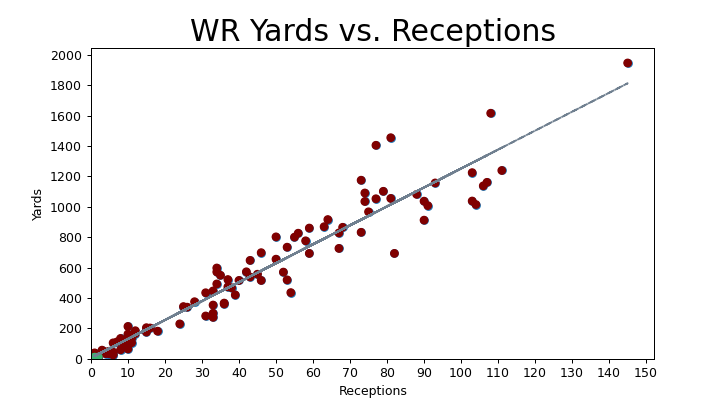

In [10]:
# Basic Graphing
x_column = 'Rec'
y_column = 'Yds'
tooltip_column = 'Name'

x = data[x_column] 
y = data[y_column]
tt = data[tooltip_column]

plt.close('all')
fig, ax = plt.subplots(1, figsize=(9,5))
sc = ax.scatter(x, y)
plt.title('WR Yards vs. Receptions', fontsize=24)
plt.xlabel('Receptions')
plt.ylabel('Yards')

lnx = plt.plot([60, 60], [0, 1.5], color='black', linewidth=0.3)
lny = plt.plot([0, 100], [1.5, 1.5], color='black', linewidth=0.3)
lnx[0].set_linestyle('None')
lny[0].set_linestyle('None')

plt.xlim(x.min()*0.95, x.max()*1.05)
plt.ylim(y.min()*0.95, y.max()*1.05)

annot = ax.annotate('', xy=(0,0), xytext=(5,5), textcoords='offset points')
annot.set_visible(False)

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regression_line = slope * x + intercept
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
r = rvalue
r_squared = r*r

# Plotting 
def getColor(player):
    if player < 825000:
#         return 'lime'
#     elif player == 3:
#         return 'mediumspringgreen'
#     elif player == 2:
#         return 'yellowgreen'
#     elif player == 1:
        return 'mediumseagreen'
    else:
        return 'maroon'
colors = [getColor(player) for player in data['Salary']]
plt.scatter(x, y, color=colors)
plt.plot(x, regression_line, "--", color='slategrey')

def hover(event):
    if event.inaxes == ax:
        lnx[0].set_data([event.xdata, event.xdata], [0, y.max() * 1.05])
        lnx[0].set_linestyle('--')
        lnx[0].set_visible(True)
        lny[0].set_data([0, x.max() * 1.05], [event.ydata, event.ydata])
        lny[0].set_linestyle('--')
        lny[0].set_visible(True)
        
        cont, ind = sc.contains(event)
        if cont:
            annot.xy = (event.xdata, event.ydata)
            annot.set_text('{}'.format(', '.join([tt[n] for n in ind['ind']])))
            annot.set_visible(True)
        else:
            annot.set_visible(False)
    else:
        lnx[0].set_visible(False)
        lny[0].set_visible(False)
    
fig.canvas.mpl_connect('motion_notify_event', hover)

# xstep = int(math.ceil(x.max()) / 5)
# ystep = int(math.ceil(y.max()) / 5)
# plt.xticks(range(0, int(x.max()) + 1, xstep))
# plt.yticks(range(0, int(y.max()) + 1, ystep))
plt.xticks(range(0, 160, 10))
plt.yticks(range(0, 2200, 200))
plt.show()

In [8]:
# plt.savefig('images/0002/leagueTDsVsSalary.png')